In [1]:
!pip install -qqq git+https://github.com/albumentations-team/albumentations.git
!pip install -qqq torchsummary
!pip install -qqq torch-lr-finder

  Preparing metadata (setup.py) ... done


In [2]:
!git clone https://github.com/amitkml/ERA-V1

Cloning into 'ERA-V1'...
remote: Enumerating objects: 246, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (177/177), done.
remote: Total 246 (delta 73), reused 179 (delta 36), pack-reused 26
Receiving objects: 100% (246/246), 90.20 MiB | 18.15 MiB/s, done.
Resolving deltas: 100% (74/74), done.
Updating files: 100% (128/128), done.


In [3]:
cd /content/ERA-V1/Session10

/content/ERA-V1/Session10


In [4]:
from utils.helper import seed_everything, get_default_device, calculate_mean_std
seed_everything(1)

In [5]:
mean, std = calculate_mean_std("CIFAR10")
mean, std

100%|██████████| 170498071/170498071 [00:18<00:00, 9465193.07it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


(array([0.49139968, 0.48215841, 0.44653091]),
 array([0.24703223, 0.24348513, 0.26158784]))

In [6]:
from utils.transforms import apply_transforms_custom_resnet
train_transforms, test_transforms = apply_transforms_custom_resnet(mean, std)

In [7]:
from torchvision import datasets

train_dataset = datasets.CIFAR10(root='data/', train=True, download=False, transform=train_transforms)
test_dataset = datasets.CIFAR10(root='data/', train=False, download=False, transform=test_transforms)

In [8]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True, pin_memory=True, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False, pin_memory=True, num_workers=2)

In [9]:
labels = train_dataset.classes
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

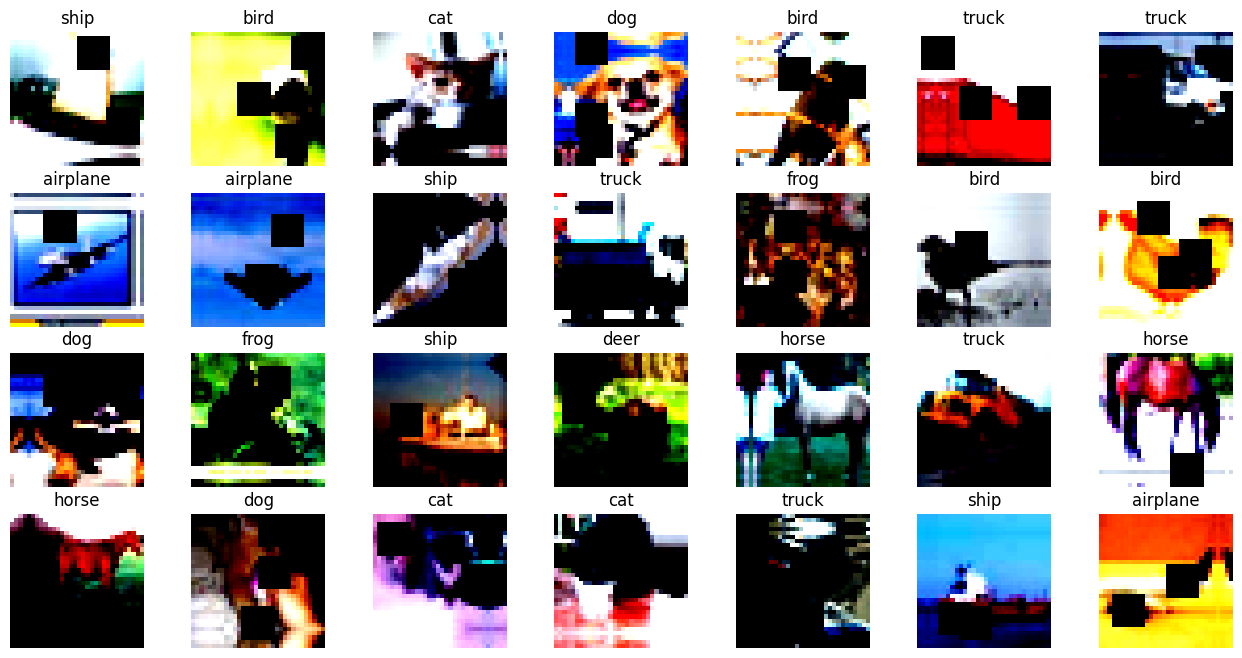

In [10]:
from utils.plot_utils import show_batch

show_batch(train_loader, labels)

In [11]:
device = get_default_device()
device

device(type='cuda')

In [12]:
from models.custom_resnet import CustomResNet
from utils.helper import model_summary

model = CustomResNet("BN").to(device)

model_summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
            Conv2d-4          [-1, 128, 32, 32]          73,856
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
       BasicBlock-12          [-1, 128, 16, 16]               0
           Conv2d-13          [-1, 256, 16, 16]         295,168
        MaxPool2d-14            [-1, 25

In [13]:
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

epochs = 24
lr = 0.001
l1_factor = 0
max_epoch = 5

optimizer = optim.SGD(model.parameters(), lr=lr,momentum=0.9, weight_decay = 0.005)
criterion = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/1896 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.92E-02


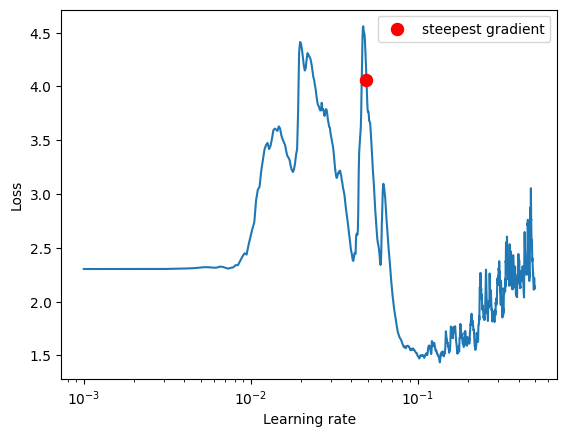

In [14]:
from utils.lr_finder import find_lr

max_lr = find_lr(model, train_loader, test_loader, epochs, optimizer, criterion, device)

In [17]:
max_lr

0.04918839050131926

In [18]:
from main import trainer

train_accuracy, train_losses, test_accuracy, test_losses = trainer(model, epochs, device, train_loader, test_loader, optimizer, criterion, l1_factor, max_lr, max_epoch)

Epoch 1:


Train Loss=1.5479767322540283 Batch_id=390 LR= 0.01026 Train Accuracy= 43.60: 100%|██████████| 391/391 [00:50<00:00,  7.73it/s]



: Average Test loss: 0.0094, Test Accuracy: 6116/10000 (61.16%)

Epoch 2:


Train Loss=0.864130973815918 Batch_id=390 LR= 0.02103 Train Accuracy= 60.58: 100%|██████████| 391/391 [00:48<00:00,  8.13it/s]



: Average Test loss: 0.0067, Test Accuracy: 7088/10000 (70.88%)

Epoch 3:


Train Loss=0.7623922824859619 Batch_id=390 LR= 0.03434 Train Accuracy= 69.37: 100%|██████████| 391/391 [00:49<00:00,  7.85it/s]



: Average Test loss: 0.0057, Test Accuracy: 7430/10000 (74.30%)

Epoch 4:


Train Loss=0.7637758255004883 Batch_id=390 LR= 0.04509 Train Accuracy= 73.99: 100%|██████████| 391/391 [00:51<00:00,  7.64it/s]



: Average Test loss: 0.0068, Test Accuracy: 7122/10000 (71.22%)

Epoch 5:


Train Loss=0.7169293761253357 Batch_id=390 LR= 0.04919 Train Accuracy= 75.18: 100%|██████████| 391/391 [00:49<00:00,  7.91it/s]



: Average Test loss: 0.0055, Test Accuracy: 7534/10000 (75.34%)

Epoch 6:


Train Loss=0.6615993976593018 Batch_id=390 LR= 0.04885 Train Accuracy= 75.89: 100%|██████████| 391/391 [00:48<00:00,  8.11it/s]



: Average Test loss: 0.0057, Test Accuracy: 7631/10000 (76.31%)

Epoch 7:


Train Loss=0.640311598777771 Batch_id=390 LR= 0.04785 Train Accuracy= 76.75: 100%|██████████| 391/391 [00:51<00:00,  7.54it/s]



: Average Test loss: 0.0075, Test Accuracy: 6767/10000 (67.67%)

Epoch 8:


Train Loss=0.94514000415802 Batch_id=390 LR= 0.04622 Train Accuracy= 76.75: 100%|██████████| 391/391 [00:52<00:00,  7.41it/s]



: Average Test loss: 0.0067, Test Accuracy: 7234/10000 (72.34%)

Epoch 9:


Train Loss=0.784213662147522 Batch_id=390 LR= 0.04400 Train Accuracy= 77.52: 100%|██████████| 391/391 [00:49<00:00,  7.86it/s]



: Average Test loss: 0.0062, Test Accuracy: 7315/10000 (73.15%)

Epoch 10:


Train Loss=0.7646262645721436 Batch_id=390 LR= 0.04124 Train Accuracy= 77.91: 100%|██████████| 391/391 [00:52<00:00,  7.46it/s]



: Average Test loss: 0.0046, Test Accuracy: 8031/10000 (80.31%)

Epoch 11:


Train Loss=0.7545222043991089 Batch_id=390 LR= 0.03804 Train Accuracy= 78.29: 100%|██████████| 391/391 [00:47<00:00,  8.30it/s]



: Average Test loss: 0.0079, Test Accuracy: 6821/10000 (68.21%)

Epoch 12:


Train Loss=0.6461143493652344 Batch_id=390 LR= 0.03446 Train Accuracy= 78.89: 100%|██████████| 391/391 [00:49<00:00,  7.90it/s]



: Average Test loss: 0.0067, Test Accuracy: 7219/10000 (72.19%)

Epoch 13:


Train Loss=0.6778917908668518 Batch_id=390 LR= 0.03062 Train Accuracy= 79.33: 100%|██████████| 391/391 [00:50<00:00,  7.70it/s]



: Average Test loss: 0.0050, Test Accuracy: 7790/10000 (77.90%)

Epoch 14:


Train Loss=0.5851505994796753 Batch_id=390 LR= 0.02662 Train Accuracy= 79.93: 100%|██████████| 391/391 [00:52<00:00,  7.44it/s]



: Average Test loss: 0.0051, Test Accuracy: 7812/10000 (78.12%)

Epoch 15:


Train Loss=0.6611266136169434 Batch_id=390 LR= 0.02255 Train Accuracy= 80.62: 100%|██████████| 391/391 [00:50<00:00,  7.81it/s]



: Average Test loss: 0.0056, Test Accuracy: 7580/10000 (75.80%)

Epoch 16:


Train Loss=0.6180647015571594 Batch_id=390 LR= 0.01855 Train Accuracy= 81.66: 100%|██████████| 391/391 [00:48<00:00,  7.99it/s]



: Average Test loss: 0.0053, Test Accuracy: 7681/10000 (76.81%)

Epoch 17:


Train Loss=0.6460245251655579 Batch_id=390 LR= 0.01471 Train Accuracy= 82.36: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s]



: Average Test loss: 0.0041, Test Accuracy: 8221/10000 (82.21%)

Epoch 18:


Train Loss=0.6025124192237854 Batch_id=390 LR= 0.01113 Train Accuracy= 83.91: 100%|██████████| 391/391 [00:46<00:00,  8.35it/s]



: Average Test loss: 0.0034, Test Accuracy: 8505/10000 (85.05%)

Epoch 19:


Train Loss=0.48781028389930725 Batch_id=390 LR= 0.00793 Train Accuracy= 85.03: 100%|██████████| 391/391 [00:48<00:00,  8.04it/s]



: Average Test loss: 0.0033, Test Accuracy: 8620/10000 (86.20%)

Epoch 20:


Train Loss=0.38796767592430115 Batch_id=390 LR= 0.00518 Train Accuracy= 87.39: 100%|██████████| 391/391 [00:46<00:00,  8.33it/s]



: Average Test loss: 0.0029, Test Accuracy: 8797/10000 (87.97%)

Epoch 21:


Train Loss=0.22787952423095703 Batch_id=390 LR= 0.00296 Train Accuracy= 89.59: 100%|██████████| 391/391 [00:51<00:00,  7.64it/s]



: Average Test loss: 0.0023, Test Accuracy: 9001/10000 (90.01%)

Epoch 22:


Train Loss=0.1879851073026657 Batch_id=390 LR= 0.00133 Train Accuracy= 92.51: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]



: Average Test loss: 0.0021, Test Accuracy: 9111/10000 (91.11%)

Epoch 23:


Train Loss=0.14682181179523468 Batch_id=390 LR= 0.00033 Train Accuracy= 94.65: 100%|██████████| 391/391 [00:49<00:00,  7.82it/s]



: Average Test loss: 0.0018, Test Accuracy: 9194/10000 (91.94%)

Epoch 24:


Train Loss=0.06818695366382599 Batch_id=390 LR= 0.00000 Train Accuracy= 96.02: 100%|██████████| 391/391 [00:47<00:00,  8.16it/s]



: Average Test loss: 0.0018, Test Accuracy: 9225/10000 (92.25%)



Total wrong predictions are 775


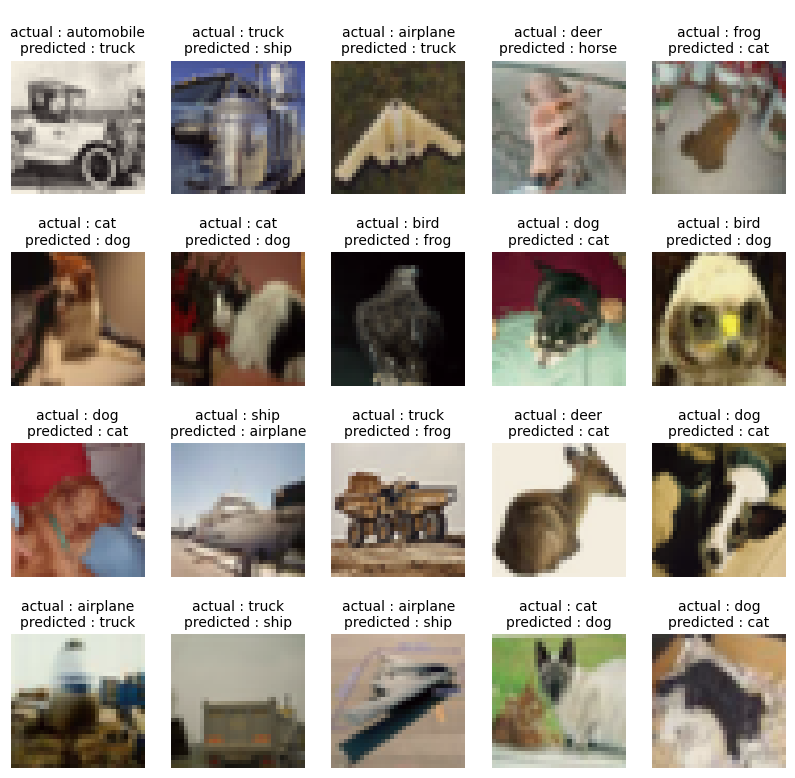

In [19]:
from utils.plot_utils import misclassified_images

images_misclassified = misclassified_images(model, test_loader, device)

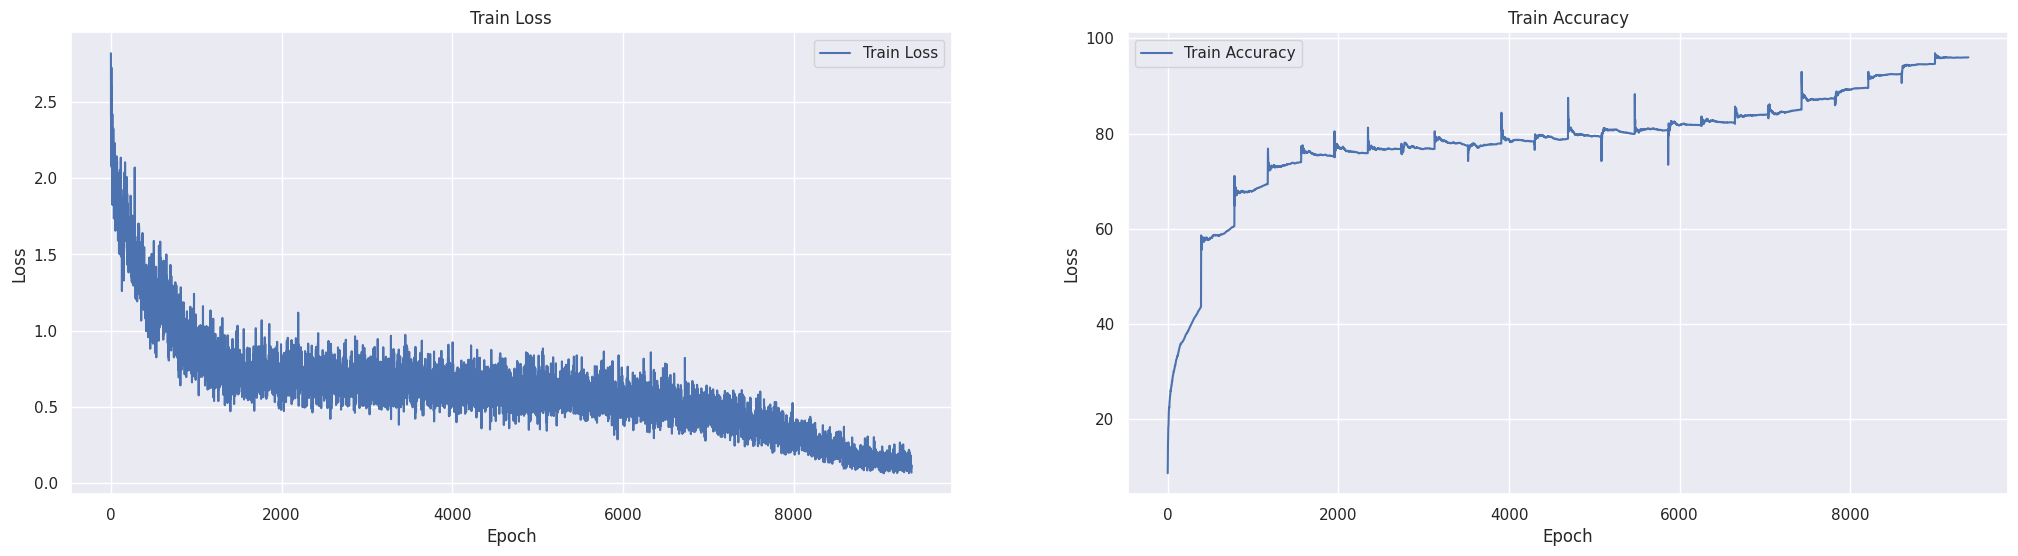

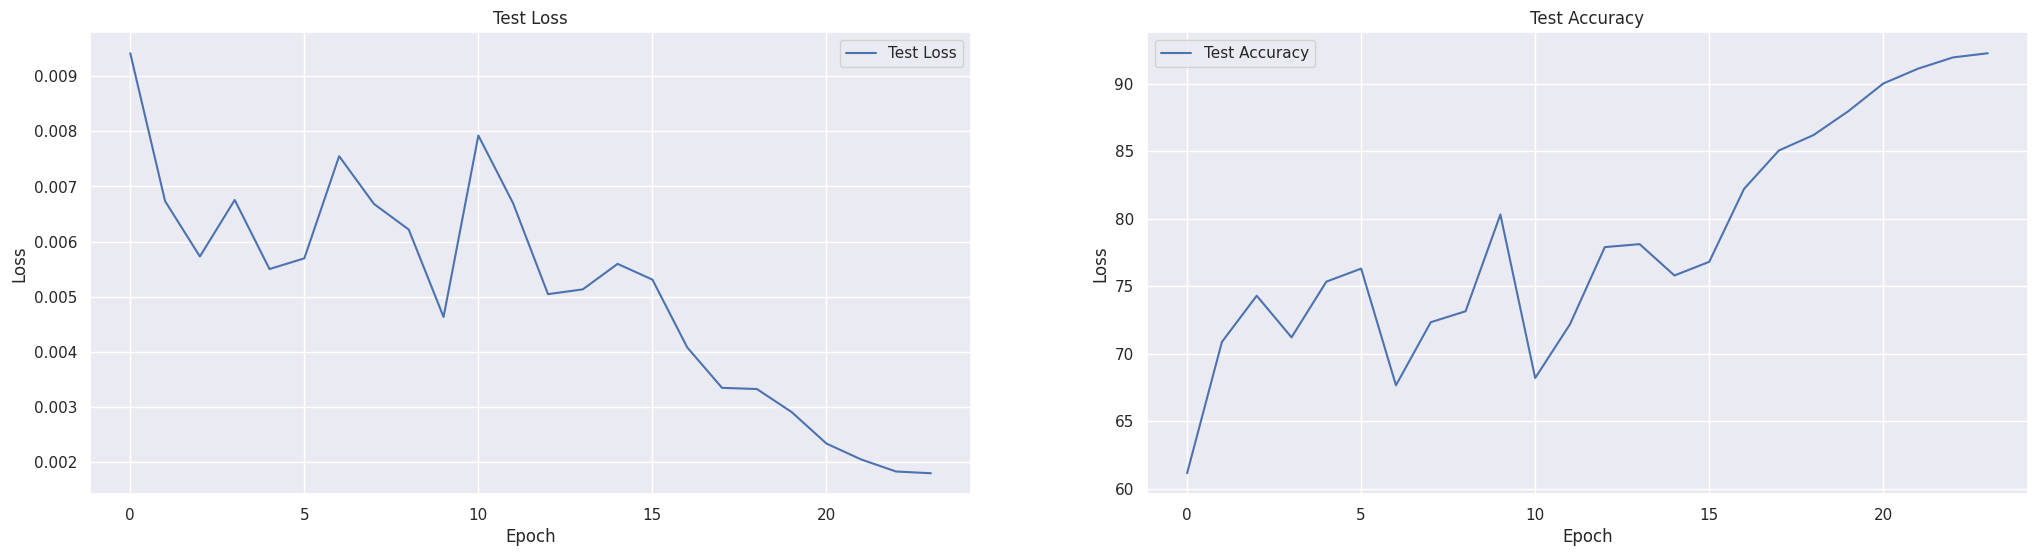

In [20]:
from utils.plot_utils import plot_metrics

plot_metrics((train_accuracy, train_losses, test_accuracy, test_losses))

In [21]:
from utils.helper import class_level_accuracy

class_level_accuracy(model, test_loader, device, labels)

Accuracy of airplane : 94 %
Accuracy of automobile : 96 %
Accuracy of  bird : 86 %
Accuracy of   cat : 82 %
Accuracy of  deer : 94 %
Accuracy of   dog : 87 %
Accuracy of  frog : 94 %
Accuracy of horse : 95 %
Accuracy of  ship : 95 %
Accuracy of truck : 95 %
